---
title: "Data Cleaning"
format:
    html: 
        code-fold: false
---

# Introduction and Motivation

The purpose of this page and the code below is to clean and tidy the collected data. This is necessary to perform before working with the code in order to avoid errors and inconsistencies. Fully cleaning the data before performing exploratory data analysis and statistical methods will ensure that we are working with accurate information and will also improve efficiency of future work due to having to deal with a fewer number of minor errors. Our conclusion and insights could potential be incorrect or not as accurate as possible if the data is not properly cleaned.

For our purposes the data cleaning process will entail the following steps. Firstly, we will identify and handle pertinent missing data. Then, outliers will be identified, addressed, and visualized to understand how they are impacting the dataset and individuals distributions. The data types will be understood and corrected to fit the needs of our future analysis. Finally, the dataset will be inspected for troublesome skewness and will later be normalized and scaled in the supervised learning portion of this work (see Supervised Learning tab for this work).

The cleaned dataset will be outputted to use for future analysis, allowing for smooth and accurate work moving forward. 

# Code and Explanations 

### Working with the Scraped Yelp Data
This section is to clean and combine the yelp datasets in order to later combine it with the zipcode income data

In [180]:
# importing all the necessary libraries for data cleaning
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# reading-in the one of the Yelp datasets
df = pd.read_csv("../../data/raw-data/df_bars1.csv")
df.head()

,Unnamed: 0,name,cuisine,price_range,rating,review_count,neighborhoods,latitude,longitude,zip_code
0,0,Jane Jane,Cocktail Bars,$$,4.5,131,NaN,38.912817,-77.03174,20009
1,1,CODE RED,Cocktail Bars,$$,4.6,114,NaN,38.921680,-77.04270,20009
2,2,The Crown & Crow,Bars,$$,4.5,149,NaN,38.907830,-77.03162,20005
3,3,The Alchemist DC,Speakeasies,NaN,4.2,82,NaN,38.916810,-77.03099,20009
4,4,Alegria,Bars,NaN,4.4,29,NaN,38.922076,-76.99657,20002


In [ ]:
# setting the data directory
data_dir = "../../data/raw-data/"

# listing the files in the directory
file_names = os.listdir(data_dir)

# creating the paths to each of the files
file_path = [os.path.join(data_dir, file) for file in file_names if file.endswith(".csv")]

# creating one large file of all combined
df1 = pd.concat(map(pd.read_csv, file_path), ignore_index=True)

# saving the combined file of all the yelp pages
df1.to_csv("../../data/processed-data/combined_yelp.csv")

In [157]:
df1 = df1.drop(['neighborhoods'], axis=1)
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1 = df1.fillna(0)
df1.head()

,name,cuisine,price_range,rating,review_count,latitude,longitude,zip_code,Label (Grouping),District of Columbia!!Estimate,...,ZCTA5 20551!!Estimate,ZCTA5 20551!!Margin of Error,ZCTA5 20560!!Estimate,ZCTA5 20560!!Margin of Error,ZCTA5 20565!!Estimate,ZCTA5 20565!!Margin of Error,ZCTA5 20566!!Estimate,ZCTA5 20566!!Margin of Error,ZCTA5 20591!!Estimate,ZCTA5 20591!!Margin of Error
0,Simona cafe,Coffee & Tea,0,4.2,31.0,38.906938,-77.007667,20002.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Gregorys Coffee,Coffee & Tea,$$,4.1,118.0,38.904302,-77.039933,20036.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,For Five Coffee Roasters,Coffee & Tea,0,3.4,28.0,38.901666,-77.045230,20006.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grafika Coffee,Coffee & Tea,0,5.0,1.0,38.907515,-77.007494,20036.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gregorys Coffee,Coffee & Tea,$$,3.6,112.0,38.895950,-77.021780,20004.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# outputting the combined yelp data
df1.to_csv("../../data/processed-data/combined_yelp.csv")

### Working with the Zip Code Income Data

Here we have obtained the zip code and median income from the Census Buerau of United States. https://data.census.gov/profile?q=washington%20dc - Here is the link to obtain the data or to other Census Buerau related data. Census Buerau has other factors for all states, like poverty rate, employment, and median rent ranges from a vast time span. The Median Income for the zip codes was over aggreated over a five year span of 2018-2023.  

Here we are cleaning the zipcode and median income dataset to make it ready for merging.


In [ ]:
# reading in the zipcode dataset
zip_code = pd.read_csv("../../data/raw-data/ACSDT5Y2022.B19013-2024-11-29T205354.csv")
zip_code = zip_code.T # transposing it
# resetting the index
zip_code.reset_index(inplace=True)
# renaming the variables
zip_code.columns = ["Category", "Value"]
# displaying the dataframe
print(zip_code)

                                  Category  \
0                         Label (Grouping)   
1           District of Columbia!!Estimate   
2    District of Columbia!!Margin of Error   
3                    ZCTA5 20001!!Estimate   
4             ZCTA5 20001!!Margin of Error   
..                                     ...   
112           ZCTA5 20565!!Margin of Error   
113                  ZCTA5 20566!!Estimate   
114           ZCTA5 20566!!Margin of Error   
115                  ZCTA5 20591!!Estimate   
116           ZCTA5 20591!!Margin of Error   

                                                 Value  
0    Median household income in the past 12 months ...  
1                                              101,722  
2                                               ±1,569  
3                                              133,211  
4                                               ±9,474  
..                                                 ...  
112                                             

In [ ]:
# grabbing just the Median Income information
zip_code = zip_code[zip_code["Category"].str.contains("Margin of Error") == False]
zip_code.head()

,Category,Value
0,Label (Grouping),Median household income in the past 12 months ...
1,District of Columbia!!Estimate,"101,722"
3,ZCTA5 20001!!Estimate,"133,211"
5,ZCTA5 20002!!Estimate,"107,130"
7,ZCTA5 20003!!Estimate,"155,054"


In [ ]:
# extractng the zipcodes
zip_code['ZIP_Code'] = zip_code['Category'].str.extract(r'ZCTA5 (\d{5})')
zip_code.head()

,Category,Value,ZIP_Code
0,Label (Grouping),Median household income in the past 12 months ...,NaN
1,District of Columbia!!Estimate,"101,722",NaN
3,ZCTA5 20001!!Estimate,"133,211",20001
5,ZCTA5 20002!!Estimate,"107,130",20002
7,ZCTA5 20003!!Estimate,"155,054",20003


In [ ]:
#dropping first column 
list(zip_code)
zip_code = zip_code.drop('Category', axis=1)
zip_code.head()

,Value,ZIP_Code
0,Median household income in the past 12 months ...,NaN
1,"101,722",NaN
3,"133,211",20001
5,"107,130",20002
7,"155,054",20003


In [ ]:
# dropping the first two rows that contain words
zip_code = zip_code.iloc[2:, :]
zip_code.head()

,Value,ZIP_Code
3,"133,211",20001
5,"107,130",20002
7,"155,054",20003
9,"152,955",20004
11,"109,147",20005


In [ ]:
# renaming the columns for clarity
zip_code.columns = ['Median_Income', 'zip_code']
zip_code

,Median_Income,zip_code
3,"133,211",20001
5,"107,130",20002
7,"155,054",20003
9,"152,955",20004
11,"109,147",20005
13,"34,352",20006
15,"145,048",20007
17,"123,134",20008
19,"132,374",20009
21,"106,560",20010


In [ ]:
# keeping only the rows with observations (0 to 45)
zip_code = zip_code.iloc[:46]
zip_code = zip_code[zip_code["Median_Income"].str.contains("-") == False]
print(zip_code)

   Median_Income zip_code
3        133,211    20001
5        107,130    20002
7        155,054    20003
9        152,955    20004
11       109,147    20005
13        34,352    20006
15       145,048    20007
17       123,134    20008
19       132,374    20009
21       106,560    20010
23        97,327    20011
25       110,375    20012
27       235,511    20015
29       169,489    20016
31        97,507    20017
33        87,552    20018
35        53,394    20019
37        48,106    20020
39        97,694    20024
41        47,871    20032
43       106,930    20036
45        94,820    20037


In [ ]:
print(zip_code)
# outputting the cleaned zip code and median income data
zip_code.to_csv('../../data/processed-data/zip_code.csv')

   Median_Income zip_code
3        133,211    20001
5        107,130    20002
7        155,054    20003
9        152,955    20004
11       109,147    20005
13        34,352    20006
15       145,048    20007
17       123,134    20008
19       132,374    20009
21       106,560    20010
23        97,327    20011
25       110,375    20012
27       235,511    20015
29       169,489    20016
31        97,507    20017
33        87,552    20018
35        53,394    20019
37        48,106    20020
39        97,694    20024
41        47,871    20032
43       106,930    20036
45        94,820    20037


### Merging Yelp and Zipcode/Income
We will now merge the two cleaned dataset into one.

In [ ]:
# reading and checking both datasets
df1 = pd.read_csv("../../data/processed-data/zip_code.csv")
df2 = pd.read_csv("../../data/processed-data/combined_yelp.csv")
print(df1)
print(df2)

    Unnamed: 0 Median_Income  zip_code
0            3       133,211     20001
1            5       107,130     20002
2            7       155,054     20003
3            9       152,955     20004
4           11       109,147     20005
5           13        34,352     20006
6           15       145,048     20007
7           17       123,134     20008
8           19       132,374     20009
9           21       106,560     20010
10          23        97,327     20011
11          25       110,375     20012
12          27       235,511     20015
13          29       169,489     20016
14          31        97,507     20017
15          33        87,552     20018
16          35        53,394     20019
17          37        48,106     20020
18          39        97,694     20024
19          41        47,871     20032
20          43       106,930     20036
21          45        94,820     20037
     Unnamed: 0                      name          cuisine price_range  \
0             0              

In [ ]:
# outer merging the datsets
merge_df = pd.merge(df1,df2,on ="zip_code",how="outer")
merge_df = merge_df.fillna(0) # fill missing with zeros

In [ ]:
# dropping the unnecessary columns
merge_df = merge_df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)
merge_df.head()

,Median_Income,zip_code,name,cuisine,price_range,rating,review_count,latitude,longitude,Label (Grouping),...,ZCTA5 20551!!Estimate,ZCTA5 20551!!Margin of Error,ZCTA5 20560!!Estimate,ZCTA5 20560!!Margin of Error,ZCTA5 20565!!Estimate,ZCTA5 20565!!Margin of Error,ZCTA5 20566!!Estimate,ZCTA5 20566!!Margin of Error,ZCTA5 20591!!Estimate,ZCTA5 20591!!Margin of Error
0,0,0.0,0,0,0,0.0,0.0,0.000000,0.000000,Median household income in the past 12 months ...,...,-,**,-,**,-,**,-,**,-,**
1,0,20000.0,Lapop,Coffee & Tea,$$,4.1,38.0,38.921329,-77.043835,0,...,0,0,0,0,0,0,0,0,0,0
2,0,20000.0,Lapop,Coffee & Tea,$$,4.1,38.0,38.921329,-77.043835,0,...,0,0,0,0,0,0,0,0,0,0
3,"133,211",20001.0,Compass Coffee,Coffee & Tea,$$,4.1,92.0,38.916256,-77.022773,0,...,0,0,0,0,0,0,0,0,0,0
4,"133,211",20001.0,Marianne’s by DC Central Kitchen,Cafes,0,4.6,17.0,38.898720,-77.024770,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# saving this merged dataset
merge_df.to_csv('../../data/processed-data/yelp_zip.csv')

In [ ]:
# reading in the combined dataset and keeping necessary columns
yelp_zip = pd.read_csv("../../data/processed-data/yelp_zip.csv")
yelp_zip = yelp_zip[['Median_Income', 'zip_code', 'name', 'cuisine', 'price_range', 'rating', 'review_count', 'latitude', 'longitude']]
print(yelp_zip.head(5))

  Median_Income  zip_code                              name       cuisine  \
0             0       0.0                                 0             0   
1             0   20000.0                             Lapop  Coffee & Tea   
2             0   20000.0                             Lapop  Coffee & Tea   
3       133,211   20001.0                    Compass Coffee  Coffee & Tea   
4       133,211   20001.0  Marianne’s by DC Central Kitchen         Cafes   

  price_range  rating  review_count   latitude  longitude  
0           0     0.0           0.0   0.000000   0.000000  
1          $$     4.1          38.0  38.921329 -77.043835  
2          $$     4.1          38.0  38.921329 -77.043835  
3          $$     4.1          92.0  38.916256 -77.022773  
4           0     4.6          17.0  38.898720 -77.024770  


### Data Type Correction and Formatting:

In this section, variables are numerized and a price variable is created based on the Yelp price ranges given on their website. The cuisine variable will be combined into fewer categories for use in later analysis.


In [172]:
# check that the variables are correct type
print(yelp_zip.dtypes)

# making median income numeric
yelp_zip['Median_Income'] = yelp_zip['Median_Income'].str.replace(",", "")
yelp_zip['Median_Income'] = pd.to_numeric(yelp_zip['Median_Income'])

print(yelp_zip.dtypes)

Median_Income     object
zip_code         float64
name              object
cuisine           object
price_range       object
rating           float64
review_count     float64
latitude         float64
longitude        float64
dtype: object
Median_Income      int64
zip_code         float64
name              object
cuisine           object
price_range       object
rating           float64
review_count     float64
latitude         float64
longitude        float64
dtype: object


In [ ]:
# encoding the price_range variable (number is the amount of dollar signs)
# just needed something numeric for price
def price_conversion(price):
    if price == "$":
        return 1
    elif price == "$$":
        return 2
    elif price == "$$$":
        return 3
    elif price == "$$$$":
        return 4
    else:
        return 0
    
yelp_zip['price_range'] = yelp_zip['price_range'].apply(price_conversion)

# There are a good amount of zeros, so will drop these:
yelp_zip = yelp_zip[yelp_zip['price_range'] != 0]

# numerizing the price_range variable:
# used the avergae of the ranges given by Yelp
price_range_values = yelp_zip['price_range'].unique()
def price_conversion(price):
    if price <= 1:
        return 5
    elif price <= 2:
        return 20.5
    elif price <= 3:
        return 45.5
    elif price <= 4:
        return 61
    else:
        return 0
yelp_zip['price'] = yelp_zip['price_range'].apply(price_conversion)

print(yelp_zip.head(5))

   Median_Income  zip_code                        name       cuisine  \
1              0   20000.0                       Lapop  Coffee & Tea   
2              0   20000.0                       Lapop  Coffee & Tea   
3         133211   20001.0              Compass Coffee  Coffee & Tea   
5         133211   20001.0  Sankofa Video Books & Cafe    Bookstores   
6         133211   20001.0           La Colombe Coffee  Coffee & Tea   

   price_range  rating  review_count   latitude  longitude  price  
1            2     4.1          38.0  38.921329 -77.043835   20.5  
2            2     4.1          38.0  38.921329 -77.043835   20.5  
3            2     4.1          92.0  38.916256 -77.022773   20.5  
5            1     4.5         167.0  38.925561 -77.023150    5.0  
6            2     4.0         303.0  38.901051 -77.020103   20.5  


In [174]:
# dropping cuisines that are zero
yelp_zip = yelp_zip[yelp_zip['cuisine'] != "0"]

# investigating the cuisine variable
cuisine_values = yelp_zip['cuisine'].unique()
print(cuisine_values)

['Coffee & Tea' 'Bookstores' 'Bakeries' 'Cafes' 'Breakfast & Brunch'
 'New American' 'Bars' 'Italian' 'Mexican' 'Peruvian' 'French' 'Pubs'
 'Chinese' 'Greek' 'Spanish' 'Thai' 'Latin American' 'Japanese' 'Ramen'
 'Persian/Iranian' 'Burgers' 'Korean' 'Sandwiches' 'Sports Bars'
 'American' 'Delis' 'Puerto Rican' 'Modern European' 'Salvadoran'
 'Asian Fusion' 'Cocktail Bars' 'Irish' 'Dive Bars' 'Beer Gardens'
 'Dance Clubs' 'Pool Halls' 'Music Venues' 'Wine Bars' 'Lounges'
 'Bubble Tea' 'Pizza' 'Trinidadian' 'Laotian' 'Sushi Bars' 'Mediterranean'
 'Steakhouses' 'Cultural Center' 'Seafood' 'Distilleries' 'Breweries'
 'Herbs & Spices' 'Indian' 'Southern' 'British' 'Mini Golf'
 'Juice Bars & Smoothies' 'Coffee Roasteries' 'Tapas/Small Plates'
 'Cantonese' 'Bagels' 'Venezuelan' 'Whiskey Bars' 'Gay Bars' 'Vietnamese'
 'Creperies' 'Ukrainian' 'Noodles' 'Belgian' 'Jazz & Blues' 'Dim Sum'
 'Scandinavian' 'Desserts' 'Vinyl Records' 'Barbeque' 'Brasseries'
 'Moroccan' 'Afghan' 'Beer Bar' 'Tiki Bars'

In [ ]:
# grouping cuisine types together to make fewer categories
def categorize_cuisine(cuisine):
  cafes = ['Coffee & Tea', 'Cafes', 'Coffee Roasteries', 'Bubble Tea', 'Juice Bars & Smoothies', 'Themed Cafes', 'Art Classes', 'Bookstores', 'Vinyl Records', 'Pet Adoption', 'Banks & Credit Unions', 'Shared Office Spaces', 'Hong Kong Style Cafe', 'Bakeries', 'Desserts', 'Chocolatiers & Shops', 'Creperies', 'Herbs & Spices']
  bars = ['Bars', 'Cocktail Bars', 'Sports Bars', 'Dive Bars', 'Speakeasies', 'Beer Gardens', 'Wine Bars', 'Tiki Bars', 'Whiskey Bars', 'Gay Bars', 'Irish Pub', 'Piano Bars', 'Jazz & Blues', 'Beer Bar', 'Pubs', 'Swimming Pools', 'Barbers', 'Lounges']
  european = ['Italian', 'French', 'Greek', 'Turkish', 'Mediterranean', 'Moroccan', 'Spanish', 'Irish', 'British', 'German', 'Belgian', 'Scandinavian', 'Modern European', 'Ukrainian', 'Georgian', 'Brasseries']
  asian = ['Chinese', 'Szechuan', 'Cantonese', 'Japanese', 'Korean', 'Thai', 'Vietnamese', 'Filipino', 'Malaysian', 'Himalayan/Nepalese', 'Dim Sum', 'Laotian', 'Asian Fusion', 'Pan Asian', 'Sushi Bars', 'Seafood', 'Ramen', 'Noodles']
  middle_eastern = ['Indian', 'Afghan', 'Persian/Iranian', 'Lebanese', 'Egyptian', 'Ethiopian', 'Falafel']
  latin = ['Mexican', 'Peruvian', 'Salvadoran', 'Venezuelan', 'Puerto Rican', 'Trinidadian', 'Brazilian', 'Latin American', 'Caribbean', 'Tacos', 'Tapas/Small Plates']
  american = ['Public Markets', 'Pizza', 'New American', 'Burgers', 'Barbeque', 'American', 'Southern', 'Vegan', 'Steakhouses']
  breakfast_lunch = ['Breakfast & Brunch', 'Specialty Food', 'Bagels', 'Salad', 'Sandwiches', 'Fish & Chips', 'Delis']
  entertainment = ['Music Venues', 'Dance Clubs', 'Karaoke', 'Pool Halls', 'Performing Arts', 'Cultural Center', 'Golf', 'Mini Golf']
  retail = ['Distilleries', 'Beer, Wine & Spirits', 'Breweries', 'Cheese Shops']
  
  if cuisine in cafes:
    return 'cafes'
  elif cuisine in bars:
    return 'bars'
  elif cuisine in european:
    return 'european'
  elif cuisine in asian:
    return 'asian'
  elif cuisine in middle_eastern:
    return 'middle_eastern'
  elif cuisine in latin:
    return 'latin'
  elif cuisine in american:
    return 'american'
  elif cuisine in breakfast_lunch:
    return 'breakfast'
  elif cuisine in entertainment:
    return 'entertainment'
  elif cuisine in retail:
    return 'retail'
  else:
    return 'other'

yelp_zip['cuisine_cat'] = yelp_zip['cuisine'].apply(categorize_cuisine)

### Missing Value Handling

Missing values are dropped for rating and median income variables and were previously dropped for the price variable.

Median_Income    0
zip_code         0
name             0
cuisine          0
price_range      0
rating           0
review_count     0
latitude         0
longitude        0
price            0
cuisine_cat      0
dtype: int64
price
20.5    387
45.5     59
5.0      52
61.0      7
Name: count, dtype: int64
Median_Income
133211    105
107130     58
132374     55
0          47
109147     45
145048     27
155054     26
97694      25
106930     25
152955     24
106560     15
34352      13
94820      12
123134     10
97507       7
97327       6
169489      3
235511      1
110375      1
Name: count, dtype: int64
zip_code
20001.0    105
20002.0     58
20009.0     55
20005.0     45
20007.0     27
20003.0     26
20024.0     25
20036.0     25
20004.0     24
20010.0     15
20006.0     13
20037.0     12
20008.0     10
20017.0      7
20011.0      6
22201.0      6
20910.0      4
22202.0      4
20016.0      3
22203.0      3
22314.0      3
20000.0      2
20735.0      2
20052.0      2
20560.0      2
22209.0 

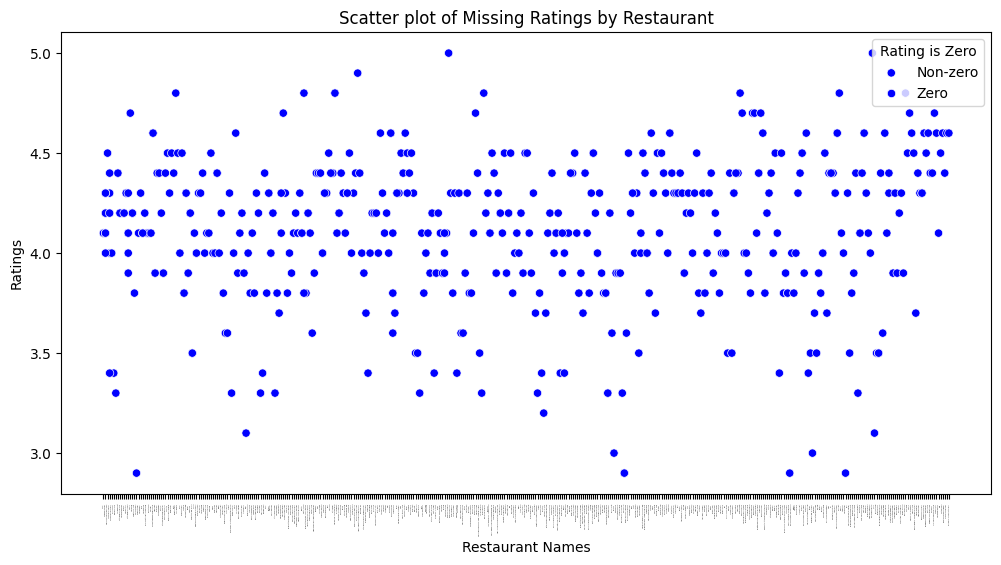

rating
4.3    61
4.1    53
4.0    53
4.4    48
4.2    46
3.9    41
3.8    36
4.5    29
4.6    16
3.3    11
3.5    11
3.4    10
3.7    10
3.6     8
4.7     7
4.8     7
2.9     5
3.0     2
3.1     1
4.9     1
5.0     1
3.2     1
Name: count, dtype: int64


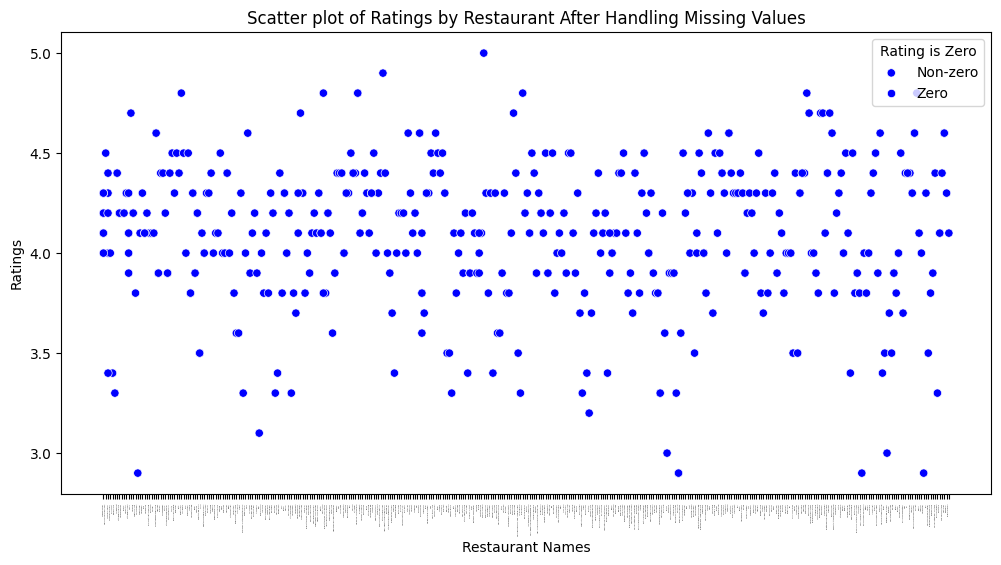

In [ ]:
# Finding missing values
missing_values = yelp_zip.isnull().sum()
print(missing_values)

# count of missing values in price (zeros)
price_counts = yelp_zip['price'].value_counts()
print(price_counts)

# count of missing values in income (zeros)
price_counts = yelp_zip['Median_Income'].value_counts()
print(price_counts)

# count of missing values in zipcode (zeros)
price_counts = yelp_zip['zip_code'].value_counts()
print(price_counts)

# count of missing values in review number (zeros)
price_counts = yelp_zip['review_count'].value_counts()
print(price_counts)

# count of missing values in rating (zeros)
price_counts = yelp_zip['rating'].value_counts()
print(price_counts)

# plot of missing rating values
# Scatter plot of restaurant names and ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=yelp_zip, x='name', y='rating', hue=(yelp_zip['rating'] == 0), palette={True: 'red', False: 'blue'})
plt.xticks(rotation=90, fontsize=0)  # Rotate x-axis labels and set font size
plt.title('Scatter plot of Missing Ratings by Restaurant')
plt.xlabel('Restaurant Names')
plt.ylabel('Ratings')
plt.legend(title='Rating is Zero', loc='upper right', labels=['Non-zero', 'Zero'])
plt.show()

# dropping the rows that have a zero for 'rating'
yelp_zip = yelp_zip[yelp_zip['rating'] != 0]
# deleting the zero values for Median_Income
yelp_zip = yelp_zip[yelp_zip['Median_Income'] != 0]

price_counts = yelp_zip['rating'].value_counts()
print(price_counts)

# plot after fixing the missing ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=yelp_zip, x='name', y='rating', hue=(yelp_zip['rating'] == 0), palette={True: 'red', False: 'blue'})
plt.xticks(rotation=90, fontsize=0)  # Rotate x-axis labels and set font size
plt.title('Scatter plot of Ratings by Restaurant After Handling Missing Values')
plt.xlabel('Restaurant Names')
plt.ylabel('Ratings')
plt.legend(title='Rating is Zero', loc='upper right', labels=['Non-zero', 'Zero'])
plt.show()

### Outlier Detection and Treatment

In this section, outliers are found for the numeric variables and removed for the review count variable, but retained for the other variables. This is because there were no overlapping outliers or clear issues with the outliers skewing the data for income and rating, thus, they were left in the dataset.

Z-score income outliers:      Median_Income  zip_code                                 name  \
382          34352   20006.0      Filter Coffeehouse Foggy Bottom   
383          34352   20006.0                Swing Coffee Roasters   
384          34352   20006.0                       Compass Coffee   
386          34352   20006.0                  Tatte Bakery & Cafe   
388          34352   20006.0                    La Colombe Coffee   
389          34352   20006.0                        Peet's Coffee   
390          34352   20006.0                        54 Restaurant   
392          34352   20006.0        Founding Farmers - Washington   
394          34352   20006.0                       Off The Record   
395          34352   20006.0    Immigrant Food at The White House   
396          34352   20006.0                       Off The Record   
398          34352   20006.0              Blackfinn Ameripub - DC   
399          34352   20006.0                       Duke's Grocery   
593      

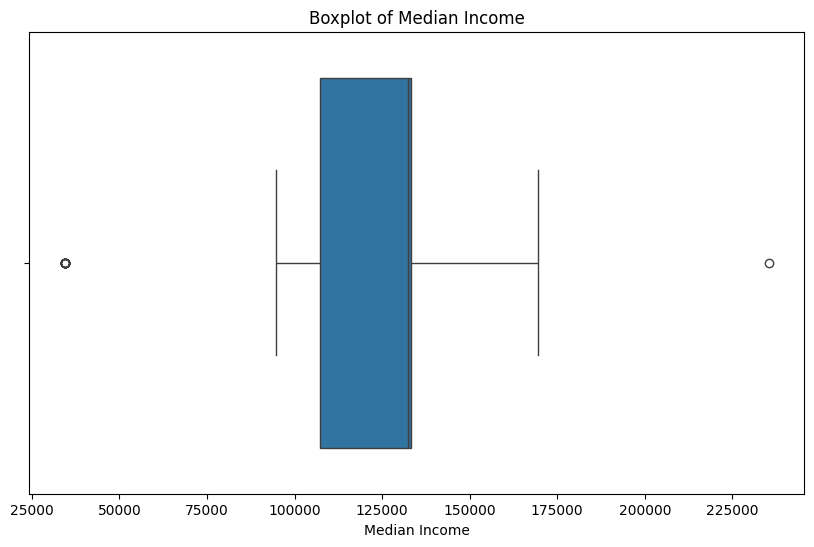

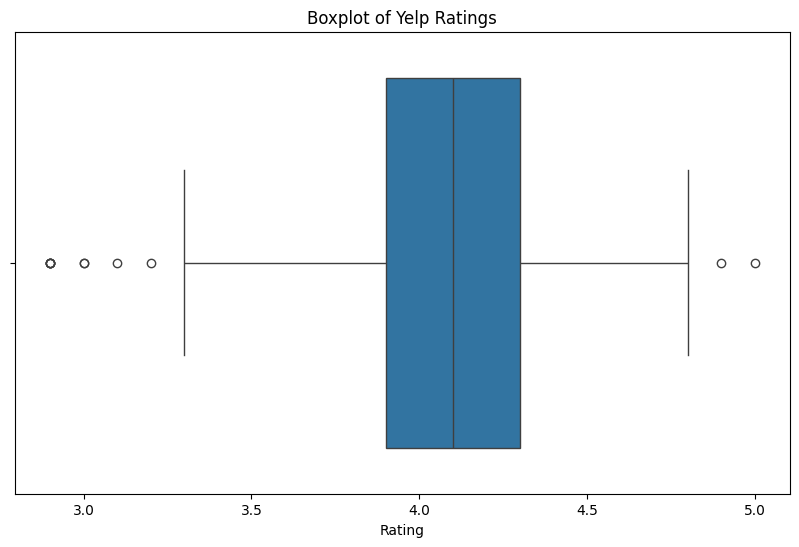

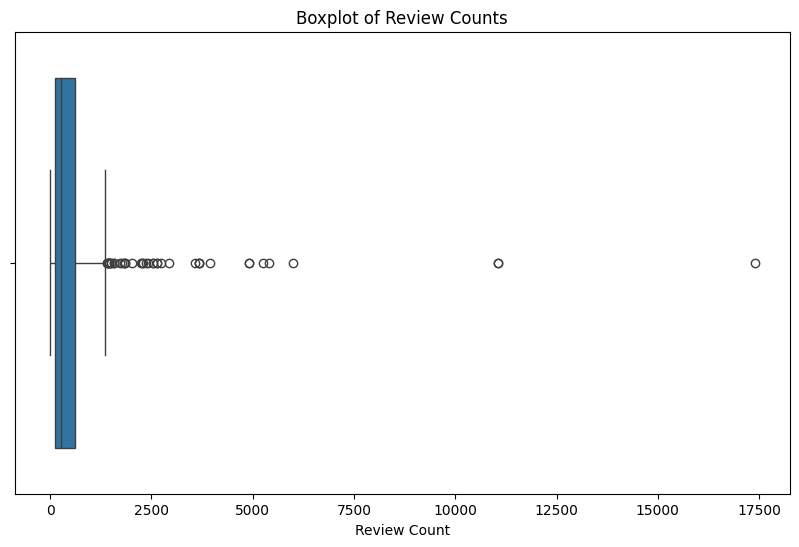

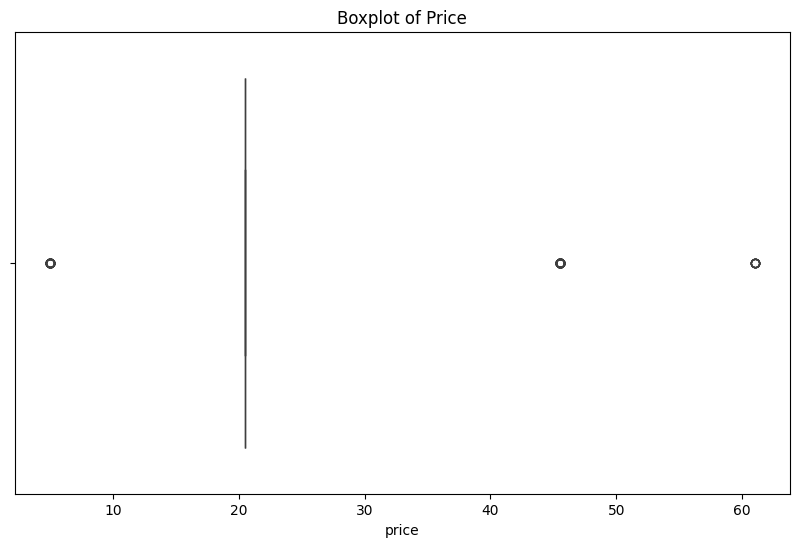

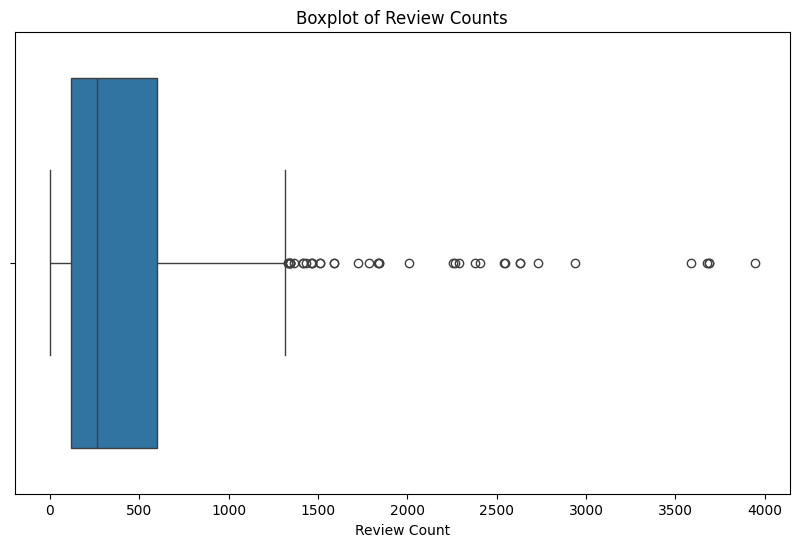

In [ ]:
# Outlier Detection using Z-Score

# Median Income (Median_Income)
yelp_zip['income_zscore'] = stats.zscore(yelp_zip['Median_Income'])
zscore_outliers = yelp_zip[(yelp_zip['income_zscore'] < -3) | (yelp_zip['income_zscore'] > 3)]
print("Z-score income outliers:", zscore_outliers)
# yields one outlier: Open City at the National Cathedral in zip: 20015

# # Rating (rating)
yelp_zip['rating_zscore'] = stats.zscore(yelp_zip['rating'])
zscore_outliers = yelp_zip[(yelp_zip['rating_zscore'] < -3) | (yelp_zip['rating_zscore'] > 3)]
print("Z-score rating outliers:", zscore_outliers)
# 6 rating outliers all with scores lower than 3.0

# # Review Count (review_count)
yelp_zip['review_zscore'] = stats.zscore(yelp_zip['review_count'])
zscore_outliers = yelp_zip[(yelp_zip['review_zscore'] < -3) | (yelp_zip['review_zscore'] > 3)]
print("Z-score review outliers:", zscore_outliers)
# for our purposes the review_count outliers are removed after visualiatization:

# Visualizing the Outliers with boxplots

# Median Income Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_zip['Median_Income'])
plt.title('Boxplot of Median Income')
plt.xlabel('Median Income')
plt.show()

# Ratings Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_zip['rating'])
plt.title('Boxplot of Yelp Ratings')
plt.xlabel('Rating')
plt.show()

# Review count Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_zip['review_count'])
plt.title('Boxplot of Review Counts')
plt.xlabel('Review Count')
plt.show()

# Price Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_zip['price'])
plt.title('Boxplot of Price')
plt.xlabel('price')
plt.show()

# remove the review count outliers:
yelp_zip = yelp_zip[(yelp_zip['review_zscore'] >= -3) & (yelp_zip['review_zscore'] <= 3)]

cols_to_drop = ['rating_zscore', 'review_zscore', 'income_zscore']
yelp_zip = yelp_zip.drop(columns=cols_to_drop)

# Review count Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_zip['review_count'])
plt.title('Boxplot of Review Counts After Removing Outliers')
plt.xlabel('Review Count')
plt.show()

### Normalization and Scaling

In this section we the distributions of the numerical variables, identifying skewness particularly. We will normalize the data in later analysis.

Median_Income   -0.829417
price_range      0.765710
rating          -0.706162
review_count     2.780277
latitude         0.646110
longitude       -0.290954
price            1.412297
dtype: float64


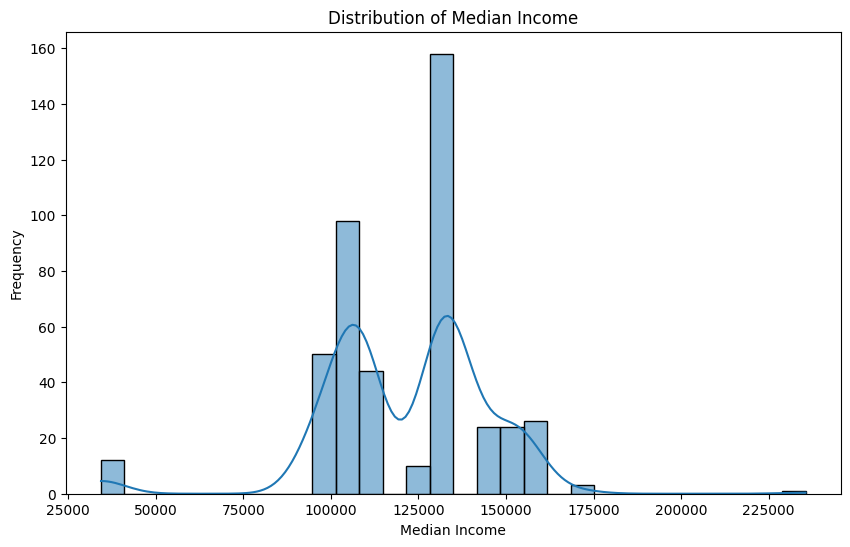

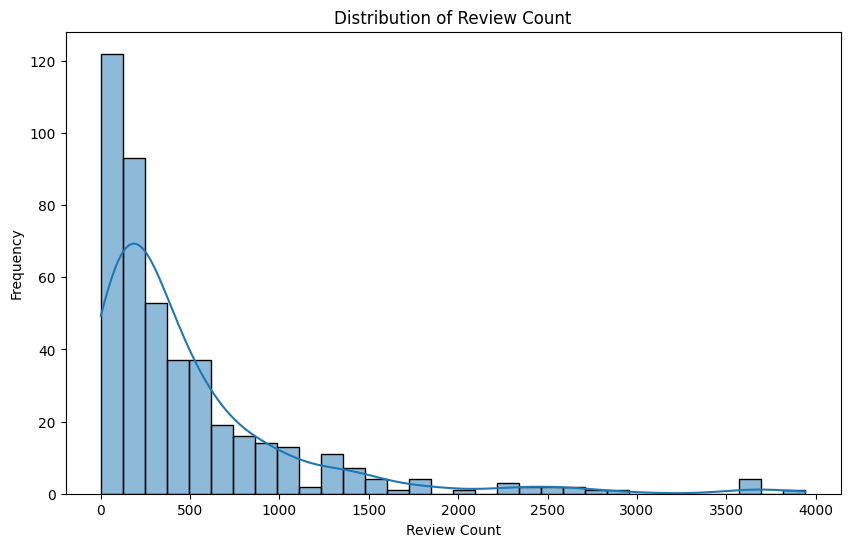

In [178]:
# Normalization and Scaling

# checking the skewness of the numeric variables
skewness = yelp_zip[['Median_Income', 'price_range', 'rating', 'review_count', 'latitude', 'longitude', 'price']].skew()
print(skewness)

# median income and review_count are highly skewed
# plotting the skewed distributions
plt.figure(figsize=(10, 6))
sns.histplot(yelp_zip['Median_Income'], kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()
# negatively skewed

plt.figure(figsize=(10, 6))
sns.histplot(yelp_zip['review_count'], kde=True)
plt.title('Distribution of Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()
# positively skewed

In [179]:
# outputting the cleaned dataset
yelp_zip.to_csv("clean_yelp_zip.csv")

# Summary and Interpretation of Results

We have now dealt with the main and pressing issues of the dataset, so that it is ready for further analysis. The first step was reading in the sraped datasets and dealing with merging them into one complete dataset. The main issue resolved after merging was the issue of datatypes, particularly for the price variable. Initially, this variable was a string variable giving the price range score given by Yelp. We encoded this value based on the number of dollar-signs given as well as computed the average price in that range given by the Yelp price ranges on their website in the price_range variable. Both price and price_range are now categorical. The cuisine variable, which was categorical, was utilized to make a new variable, cuisine_cat, that groups the cuisine categories together to make it cleaner and easier to visualize in analysis (this was done with the aid of AI and through judgemnet decisions). We also dealt with missing values in the price and cuisine variables by removing these rows from the dataset. Additionally, we removed the z-score statistical outliers present in the review count variable. We finally checked for skewness, finding no immediately worrisome results and held off on normalization of the data. We are now ready to tackle Supervised and Unsupervised learning.